<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Aluno: Joao Paulo Socio RA 20.00704-3

# **P2S1 2024S1 ECM514 LAB - Ciência de Dados**

Nesta avaliação você terá a oportunidade de empregar o que aprendeu até aqui para fazer transformações, analisar dependências e correlações, trabalhar com distribuições e muito mais em diferentes casos de uso reais.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import IFrame

path = 'https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/'

# **CASO: CO₂ and Greenhouse Gas Emissions**

Os dados de emissões de CO₂ e temperatura Global podem ser obtidos no site abaixo. Mas já estão pré-tratados abaixo.



In [ ]:
IFrame('https://ourworldindata.org/co2-and-greenhouse-gas-emissions', width=1000, height=300)

In [ ]:
df1 = pd.read_csv(path + 'temperature-anomaly.csv')
df1 = df1[df1.Entity == 'Global']
df1 = df1.iloc[:,2:4]
df1.columns = ['year','temperature']
df1.head()

,year,temperature
0,1850,-0.417711
1,1851,-0.233350
2,1852,-0.229399
3,1853,-0.270354
4,1854,-0.291521


In [ ]:
df2 = pd.read_csv(path + 'co-emissions-per-capita.csv')
df2 = df2[ df2.Entity.isin(['Brazil','World','China','United States','Europe (excl. EU-28)']) ].reset_index(drop=True)
df2 = df2.iloc[:,[0,2,3]]
df2.columns = ['country', 'year','co2']
df2.head()

,country,year,co2
0,Brazil,1901,0.113905
1,Brazil,1902,0.132818
2,Brazil,1903,0.126605
3,Brazil,1904,0.133064
4,Brazil,1905,0.139196


# Q1.a. (Tarefa) (2.0)

Faça um gráfico o mais próximo possível do gráfico abaixo e **poste a figura do seu gráfico no Canvas na tarefa correspondente**.

Tenha atenção aos seguintes pontos do gráfico:

1. Escalas para o eixo y
2. Preenchimento de áreas de interesse
3. Inclusões de texto
4. Uso de transparência nas cores
5. Proporções dos fontes

Você não precisa se preocupar em reproduzir as cores exatas. Sugestão: empregue o `seaborn` e uma figura `figsize=(12,4)`.

In [ ]:
df_merged = pd.merge(df1,df2,on='year')
df_merged.head()

,year,temperature,country,co2
0,1850,-0.417711,Europe (excl. EU-28),0.003447
1,1850,-0.417711,United States,0.838701
2,1850,-0.417711,World,0.153855
3,1851,-0.233350,Europe (excl. EU-28),0.002184
4,1851,-0.233350,United States,1.013303


In [ ]:
df_merged['country'].unique()


,year,temperature,country,co2
0,1850,-0.417711,Europe (excl. EU-28),0.003447
3,1851,-0.233350,Europe (excl. EU-28),0.002184
6,1852,-0.229399,Europe (excl. EU-28),0.002165
9,1853,-0.270354,Europe (excl. EU-28),0.002356
12,1854,-0.291521,Europe (excl. EU-28),0.003321
...,...,...,...,...
734,2018,0.762654,Europe (excl. EU-28),9.286491
739,2019,0.891073,Europe (excl. EU-28),9.213170
744,2020,0.922921,Europe (excl. EU-28),8.830373
749,2021,0.761906,Europe (excl. EU-28),9.229135


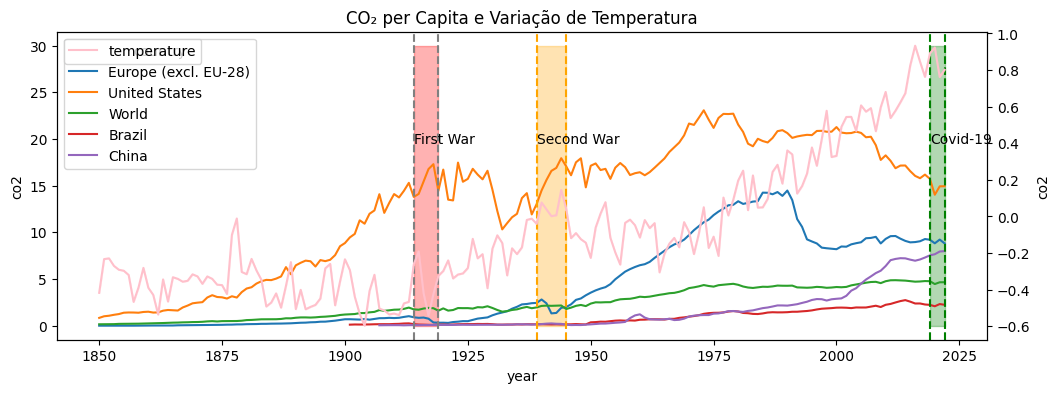

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=df_merged, x='year', y='co2', hue='country', palette='tab10',ax=ax)

ax.axvline(x=1914, color='gray', linestyle='--')
ax.axvline(x=1919, color='gray', linestyle='--')
ax.axvline(x=1939, color='orange', linestyle='--')
ax.axvline(x=1945, color='orange', linestyle='--')
ax.axvline(x=2019, color='green', linestyle='--')
ax.axvline(x=2022, color='green', linestyle='--')

ax.text(1914, 20, 'First War', verticalalignment='center')
ax.text(1939, 20, 'Second War', verticalalignment='center')
ax.text(2019, 20, 'Covid-19', verticalalignment='center')


ax.fill_betweenx([0, 30], 1914, 1919, color='red', alpha=0.3)
ax.fill_betweenx([0, 30], 1939, 1945, color='orange', alpha=0.3)
ax.fill_betweenx([0, 30], 2019, 2022, color='green', alpha=0.3)


ax2 = ax.twinx()
sns.lineplot(data=df_merged, x='year', y='temperature',color='pink',label='temperature', ax=ax2)
ax2.set_ylabel('temperature')
ax2.legend(['temperature'],)


plt.title('CO₂ per Capita e Variação de Temperatura')
plt.xlabel('year')
plt.ylabel('co2')


plt.show()

In [ ]:
fig.savefig("Q1a.png")

from google.colab import files
files.download("Q1a.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Q1.b. (1,0)


Avalie **para os dados a partir de 1990 (inclusive)** a correlação entre as emissões de cada país e a temperatura através do coeficiente de `pearson`, incluindo sua significância, e responda ao teste correspondente no questionário do Canvas.

In [ ]:
df_merged = df_merged[df_merged.year >= 1990]
df_merged.head()

,year,temperature,country,co2
592,1990,0.360582,Brazil,1.450887
593,1990,0.360582,China,2.153806
594,1990,0.360582,Europe (excl. EU-28),14.481453
595,1990,0.360582,United States,20.642052
596,1990,0.360582,World,4.279900


In [ ]:
df_merged.groupby('country').co2.corr(df_merged.temperature).sort_values(ascending=False)

country
China                   0.855632
Brazil                  0.760247
World                   0.724366
Europe (excl. EU-28)   -0.334652
United States          -0.817199
Name: co2, dtype: float64

# **CASO: Titanic Survivals**

Os dados do acidente do Titanic são até hoje uma das maiores fontes de dados para correlacionar fatores de sobrevivência do ser humano a desastres. A seguir você vai fazer análise de alguns desses fatores.





In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df['age'].max()

80.0

Analise aqui a **influência da classe (pclass) de embarque do passageiro na sua sobrevivência.** Veja e responda ao teste correspondentes no Canvas.


# Q2.a. (0,5)

Qual o teste de hipótese mais adequado para análise da influência da classe (pclass) de embarque do passageiro na sua sobrevivência?

<Axes: xlabel='pclass', ylabel='survived'>

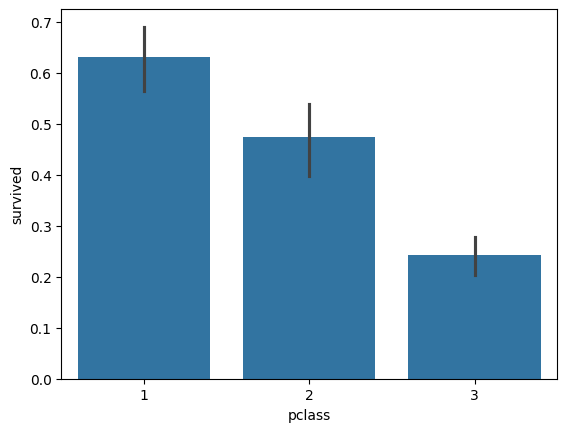

In [ ]:
sns.barplot(x='pclass',y='survived',data=df)

Chi-Square Test é a melhor opção por se tratar de variáveis categóricas

# Q2.b. (1,0)

Qual o resultado do teste de hipótese mais adequado para análise da influência da classe (pclass) de embarque do passageiro na sua sobrevivência?

In [ ]:
contingency_table = pd.crosstab(df['pclass'], df['survived'])

In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Tabela de Contingência:\n", contingency_table)
print("\nEstatística qui-quadrado:", chi2)
print("p-valor:", p)
print("Graus de liberdade:", dof)
print("Frequências esperadas:\n", expected)

Tabela de Contingência:
 survived    0    1
pclass            
1          80  136
2          97   87
3         372  119

Estatística qui-quadrado: 102.88898875696056
p-valor: 4.549251711298793e-23
Graus de liberdade: 2
Frequências esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


Analise aqui a **dependência da sobrevivência dos passageiros com relação a idade** dos passageiros. Veja e responda ao teste correspondentes no Canvas.


# Q2.c. (0,5)

Qual o teste de hipótese mais adequado para análise da influência da idade do passageiro na sua sobrevivência? Você pode assumir que a **idade tem distribuição normal**.

T Student pois estamos assumindo distribuição normal e não sao dados pareados.

# Q2.d. (1,0)

Qual o resultado do teste de hipótese mais adequado para análise da influência da idade do passageiro na sua sobrevivência?

**Importante**: Elimine se necessário dados ausentes de `age`, mas somente de `age`.

In [ ]:
from scipy.stats import ttest_ind

df_titanic = df.dropna(subset=['age'])

age_survived = df_titanic[df_titanic['survived'] == 1]['age']
age_not_survived = df_titanic[df_titanic['survived'] == 0]['age']

t_stat, p_value = ttest_ind(age_survived, age_not_survived)

print("Estatística t:", t_stat)
print("p-valor:", p_value)

Estatística t: -2.06668694625381
p-valor: 0.03912465401348249


In [ ]:
if p_value < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")

Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.


# Q2.e. (1,0)

Verifique agora a influência da idade maior ou menor do passageiro na sua sobrevivência? Qual o resultado do seu teste?



In [ ]:
# seu código

# **CASO: CNN news**

Vamos retomar o caso dos dados de comentários de notícias postados pelo canal CNN. **Deve ser útil para você acessar a solução da P1 aqui, onde vimos este caso antes.**

Vamos considerar somente os posts com as palavras `['Biden','Trump','Ukraine','Russia','US']`.

In [ ]:
df = pd.read_csv(path + 'Cleaned_cnn_comments.csv')
df.head()

,comment_text,likes,comment_time
0,"Just like US did not abandon Vietnam, Iraq, Af...",73,7200.0
1,Anybody else getting tired of these people spe...,193,7200.0
2,"""If two fish are fighting in a river an Englis...",45,7200.0
3,"""Not abandon"" is not equal to ""Defend/no fly-z...",7,7200.0
4,It's time we pray that our world leaders get a...,52,7200.0


In [ ]:
def word_exist(x):
  for word in ['Biden','Trump','Ukraine','Russia','US']:
    if x.count(word) > 0:
      return word
  return None

df['word'] = df.comment_text.apply(lambda x: word_exist(x))

df = df[ df['word'] != None ].reset_index(drop=True)
df.groupby('word').word.count().sort_values(ascending=False)

word
Trump      1162
Ukraine     881
Russia      575
US          418
Biden       289
Name: word, dtype: int64

# Q3.a. (0,5)

Qual o teste de hipótese mais adequado para análise das quantidades de Likes (isto é, se são significativamente iguais ou diferentes em algum sentido) entre comentários postados de duas classes diferentes, por exemplo `Biden` e `Trump`?

# Q3.b. (1,0)

Quais os resultados dos teste de hipótese mais adequado para análise das quantidades de Likes (isto é, se são significativamente iguais ou diferentes em algum sentido) entre comentários postados abaixo?

* posts Ukraine $\times$ Russia

* posts US $\times$ Russia

In [ ]:
# seu código

# **CASO: Manutenção de Peças**

A distribuição de Weibull (`weibull_min`) representa a probabilidade de falha de peças com desgaste e é amplamente empregada na indústria para prever manutenções.



# Q4.a. (Tarefa) (0,5)

Crie uma distribuição de Weibull (`weibull_min`) com o parâmetro `c = 1.7` (tempo em anos) e faça um gráfico o mais próximo possível do gráfico abaixo das curvas de distribuição. **Poste a figura do seu gráfico no Canvas na tarefa correspondente**.

Você não precisa se preocupar em reproduzir as cores exatas. Sugestão: empregue o `seaborn` e uma figura `figsize=(12, 4)`.

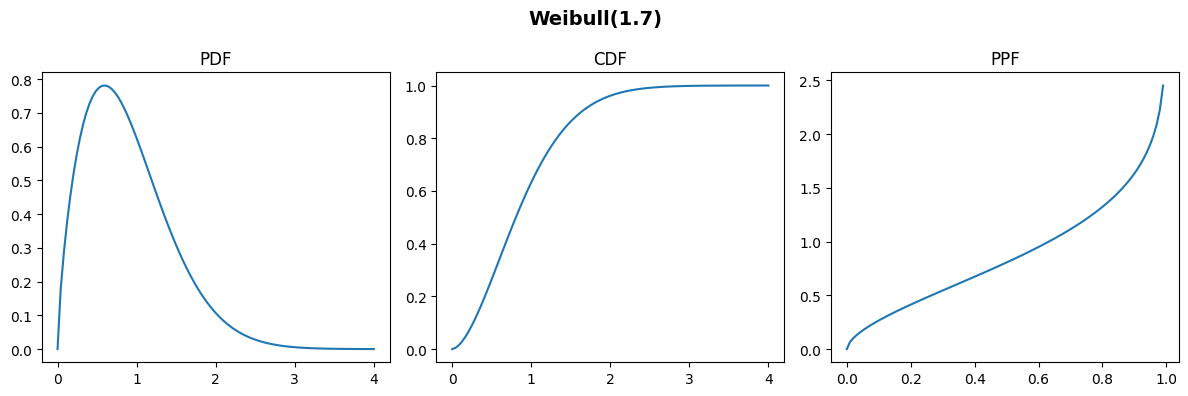

In [ ]:
# seu código

In [ ]:
from scipy.stats import weibull_min



In [ ]:
sample_size = 1000

In [ ]:
np.random.seed(1)
normal_samples = weibull_min.rvs(c=1.7, size=sample_size)
normal_samples[:10]

array([0.69566159, 1.15315977, 0.00480159, 0.54829025, 0.33866209,
       0.25332459, 0.39494317, 0.60365566, 0.66941331, 0.86008273])

In [ ]:
y = weibull_min.pdf(normal_samples, c=1.7)

In [ ]:
np.random.seed(1)
x = x = np.linspace(0,1,50)
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

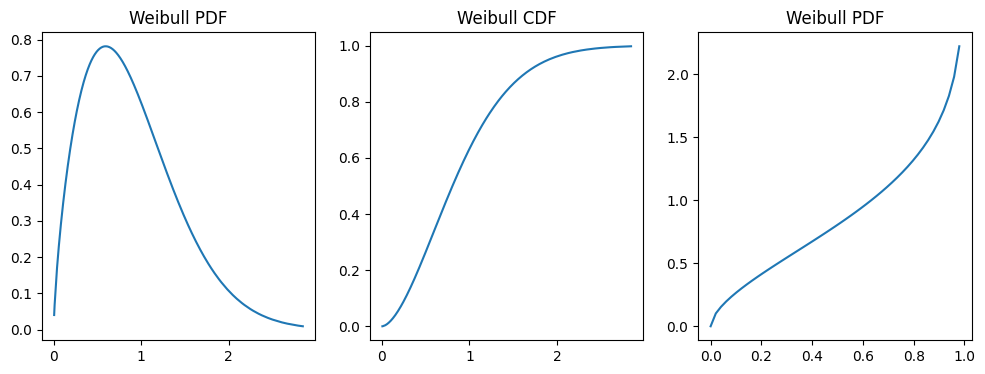

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12, 4))
sns.lineplot(x=normal_samples, y=weibull_min.pdf(normal_samples, c=1.7),ax=ax[0])
sns.lineplot(x=normal_samples,y=weibull_min.cdf(normal_samples, c=1.7),ax=ax[1])
sns.lineplot(x=x,y=weibull_min.ppf(x, c=1.7),ax=ax[2])

ax[0].set_title('Weibull PDF')
ax[1].set_title('Weibull CDF')
ax[2].set_title('Weibull PPF')

plt.title('Weibull PDF')
plt.show()

In [ ]:
fig.savefig("Q4a.png")

from google.colab import files
files.download("Q4a.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Q4.b. (0,5)

Considerando a distribuição Weibull(1.7), qual a probabilidade de uma peça não apresentar problemas depois de 2 anos?


In [ ]:
probabilidade = 1 - weibull_min.cdf(2, c=1.7)
probabilidade

0.038812629395792664

# Q4.c. (0,5)

Considerando a distribuição Weibull(1.7), qual a probabilidade de uma peça apresentar problemas entre 1 e 2 anos?


In [ ]:
probabilidade = weibull_min.cdf(2, c=1.7) - weibull_min.cdf(1, c=1.7)
probabilidade

0.32906681177564967

# Q4.d. (0,5)

Considerando a distribuição Weibull(1.7), na aquisição e começo de uso das peças você compra 25% de peças adicionais para substituição. Até quando esse estoque de peças deve atender as trocas necessárias tendo que programar a próxima compra de estoques?

In [ ]:
anos = weibull_min.ppf(0.25, c=1.7)
anos

0.4805221493741585

# **CASO: Temperaturas mensais na Basiléia**

Os dados abaixo coletados de https://www.meteoblue.com/ apresentam as temperaturas mensais de basiléia a partir de 2014.

É comum em séries temporais, como as temperaturas ao longo do ano, ter uma dependência ou correlação (`pearson`) com os valores anteriores da série. A temperatura hoje, por exemplo, está mais correlacionada à temperatura de ontem, e provavelmente menos correlacionada com a temperatura de 60 atrás.



In [ ]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel(path + 'dataexport_20240613T041833.xlsx',skiprows=9)
df.set_index('timestamp',inplace=True)
df.columns = ['T']
df = df.resample('M').mean()
df.head()

,T
timestamp,
2014-01-31,4.613095
2014-02-28,5.618519
2014-03-31,8.180178
2014-04-30,12.219051
2014-05-31,14.170581


# Q5.a. (0,5)

Calcule a correlação entre os valores defasados da série, isto é:

$$ pearson(T_t,T_{t-1}) $$
$$ pearson(T_t,T_{t-2}) $$
$$ ... $$
$$ pearson(T_t,T_{t-11}) $$
$$ pearson(T_t,T_{t-12}) $$

Quais os valores de correlação encontrados? Veja que $ pearson(T_t,T_t) = 1$.

**Dica:** empregue a função `.shift()` do `Pandas`.

In [ ]:
# seu código